In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [64]:
# Function to load JSON lines from a file
def load_json_lines(file_path):
    with open(file_path, 'r') as file:
        return [json.loads(line) for line in file]

In [65]:
# Load JSON data
player_movements_data = load_json_lines('player_movements.json')

In [66]:
# Convert JSON data to DataFrame
merged_df = pd.DataFrame(player_movements_data)

In [67]:
# Handle the 'Name' column and other specific columns for clarity
merged_df.rename(columns={
    'Name': 'player_name',
    'Former City': 'prev_city',
    'New City': 'new_city',
    'Year 1': 'year1',
    'Year 2': 'year2',
    'prev_city_latitude': 'prev_city_lat',
    'prev_city_longitude': 'prev_city_lon',
    'new_city_latitude': 'new_city_lat',
    'new_city_longitude': 'new_city_lon',
    'prev_city_year1_avg_temp': 'prev_city_year1_avg_temp',
    'prev_city_year2_avg_temp': 'prev_city_year2_avg_temp',
    'new_city_year1_avg_temp': 'new_city_year1_avg_temp',
    'new_city_year2_avg_temp': 'new_city_year2_avg_temp',
    'new_city_state': 'new_city_state',
    'prev_city_state': 'prev_city_state',
    'new_city_pci_year1': 'new_city_pci_year1',
    'new_city_pci_year2': 'new_city_pci_year2',
    'prev_city_pci_year1': 'prev_city_pci_year1',
    'prev_city_pci_year2': 'prev_city_pci_year2',
    'new_state_tier_year1': 'new_state_tier_year1',
    'new_state_tier_year2': 'new_state_tier_year2',
    'prev_state_tier_year1': 'prev_state_tier_year1',
    'prev_state_tier_year2': 'prev_state_tier_year2'
}, inplace=True)

In [68]:
# Remove commas from PCI columns and convert to float
merged_df['new_city_pci_year1'] = merged_df['new_city_pci_year1'].str.replace(',', '').astype(float)
merged_df['new_city_pci_year2'] = merged_df['new_city_pci_year2'].str.replace(',', '').astype(float)
merged_df['prev_city_pci_year1'] = merged_df['prev_city_pci_year1'].str.replace(',', '').astype(float)
merged_df['prev_city_pci_year2'] = merged_df['prev_city_pci_year2'].str.replace(',', '').astype(float)


In [69]:
# Calculate differences
merged_df['pci_diff_year1'] = merged_df['new_city_pci_year1'] - merged_df['prev_city_pci_year1']
merged_df['pci_diff_year2'] = merged_df['new_city_pci_year2'] - merged_df['prev_city_pci_year2']
merged_df['temp_diff_year1'] = merged_df['new_city_year1_avg_temp'] - merged_df['prev_city_year1_avg_temp']
merged_df['temp_diff_year2'] = merged_df['new_city_year2_avg_temp'] - merged_df['prev_city_year2_avg_temp']

In [72]:
# Define bins for PCI and temperature differences
pci_diff_bins = pd.qcut(pd.concat([merged_df['pci_diff_year1'], merged_df['pci_diff_year2']]), 8, duplicates='drop').cat.categories
temp_diff_bins = pd.qcut(pd.concat([merged_df['temp_diff_year1'], merged_df['temp_diff_year2']]), 8, duplicates='drop').cat.categories


In [73]:
# Bin the PCI and temperature differences
merged_df['pci_diff_year1_binned'] = pd.cut(merged_df['pci_diff_year1'], bins=pci_diff_bins)
merged_df['pci_diff_year2_binned'] = pd.cut(merged_df['pci_diff_year2'], bins=pci_diff_bins)
merged_df['temp_diff_year1_binned'] = pd.cut(merged_df['temp_diff_year1'], bins=temp_diff_bins)
merged_df['temp_diff_year2_binned'] = pd.cut(merged_df['temp_diff_year2'], bins=temp_diff_bins)


In [75]:
# Define bins for non-difference PCI and temperature
pci_bins = pd.qcut(pd.concat([merged_df['new_city_pci_year1'], merged_df['new_city_pci_year2'], merged_df['prev_city_pci_year1'], merged_df['prev_city_pci_year2']]), 8, duplicates='drop').cat.categories
temp_bins = pd.qcut(pd.concat([merged_df['new_city_year1_avg_temp'], merged_df['new_city_year2_avg_temp'], merged_df['prev_city_year1_avg_temp'], merged_df['prev_city_year2_avg_temp']]), 8, duplicates='drop').cat.categories

In [76]:
# Bin the non-difference PCI and temperature
merged_df['new_city_pci_year1_binned'] = pd.cut(merged_df['new_city_pci_year1'], bins=pci_bins)
merged_df['new_city_pci_year2_binned'] = pd.cut(merged_df['new_city_pci_year2'], bins=pci_bins)
merged_df['prev_city_pci_year1_binned'] = pd.cut(merged_df['prev_city_pci_year1'], bins=pci_bins)
merged_df['prev_city_pci_year2_binned'] = pd.cut(merged_df['prev_city_pci_year2'], bins=pci_bins)
merged_df['new_city_temp_year1_binned'] = pd.cut(merged_df['new_city_year1_avg_temp'], bins=temp_bins)
merged_df['new_city_temp_year2_binned'] = pd.cut(merged_df['new_city_year2_avg_temp'], bins=temp_bins)
merged_df['prev_city_temp_year1_binned'] = pd.cut(merged_df['prev_city_year1_avg_temp'], bins=temp_bins)
merged_df['prev_city_temp_year2_binned'] = pd.cut(merged_df['prev_city_year2_avg_temp'], bins=temp_bins)

In [88]:
# Set the style for seaborn
sns.set(style="whitegrid")

In [96]:
# Define the function to plot and save frequency bar graphs
def plot_and_save_frequency_bar_graph(data, column, title, xlabel, ylabel, filename):
    plt.figure(figsize=(14, 8))
    sns.countplot(data=data, x=column)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

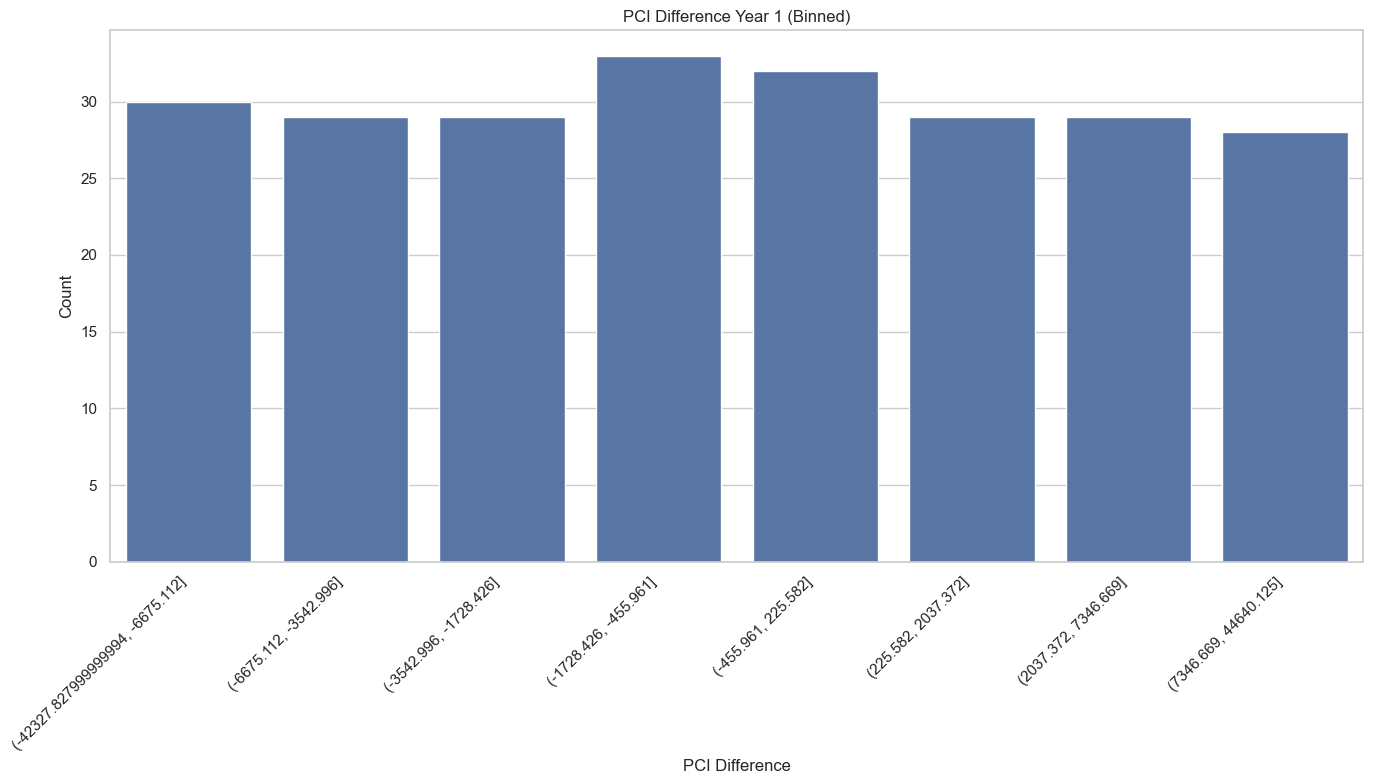

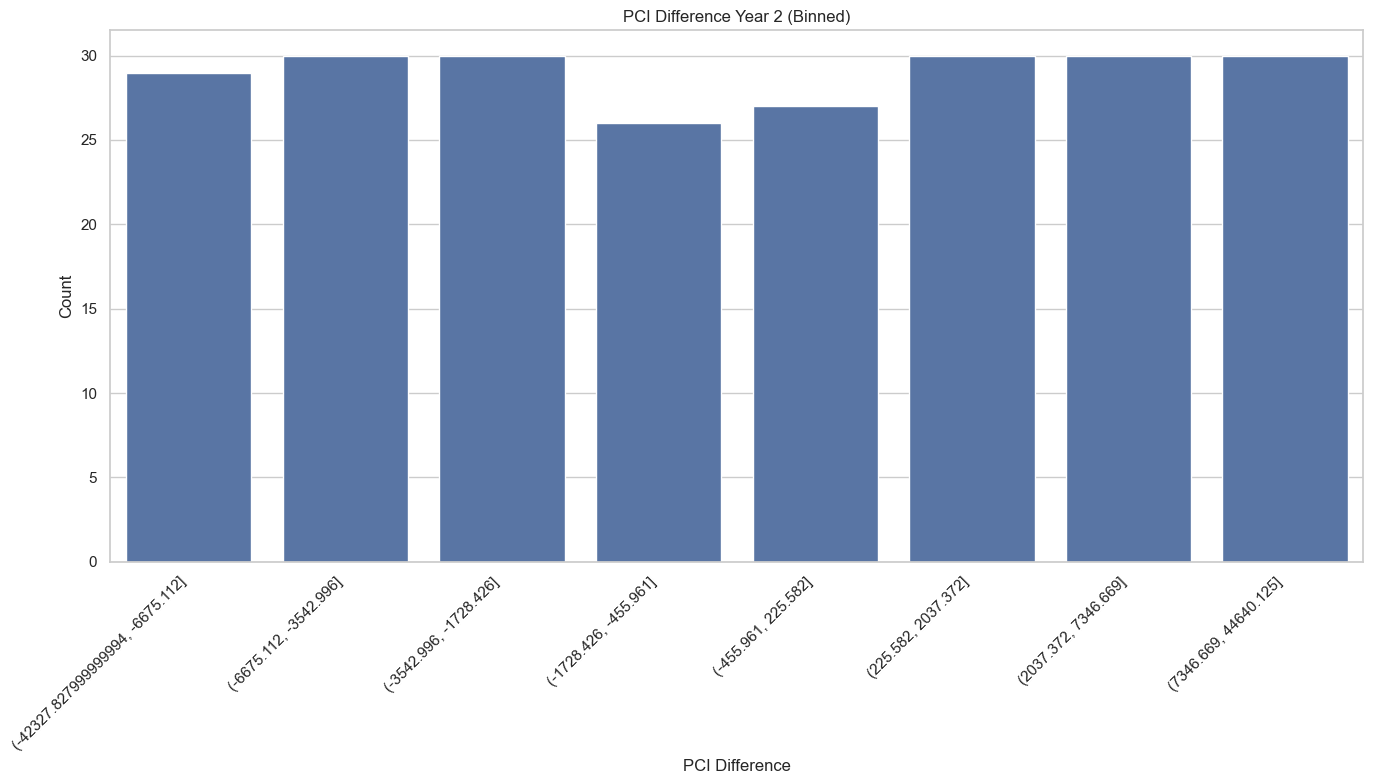

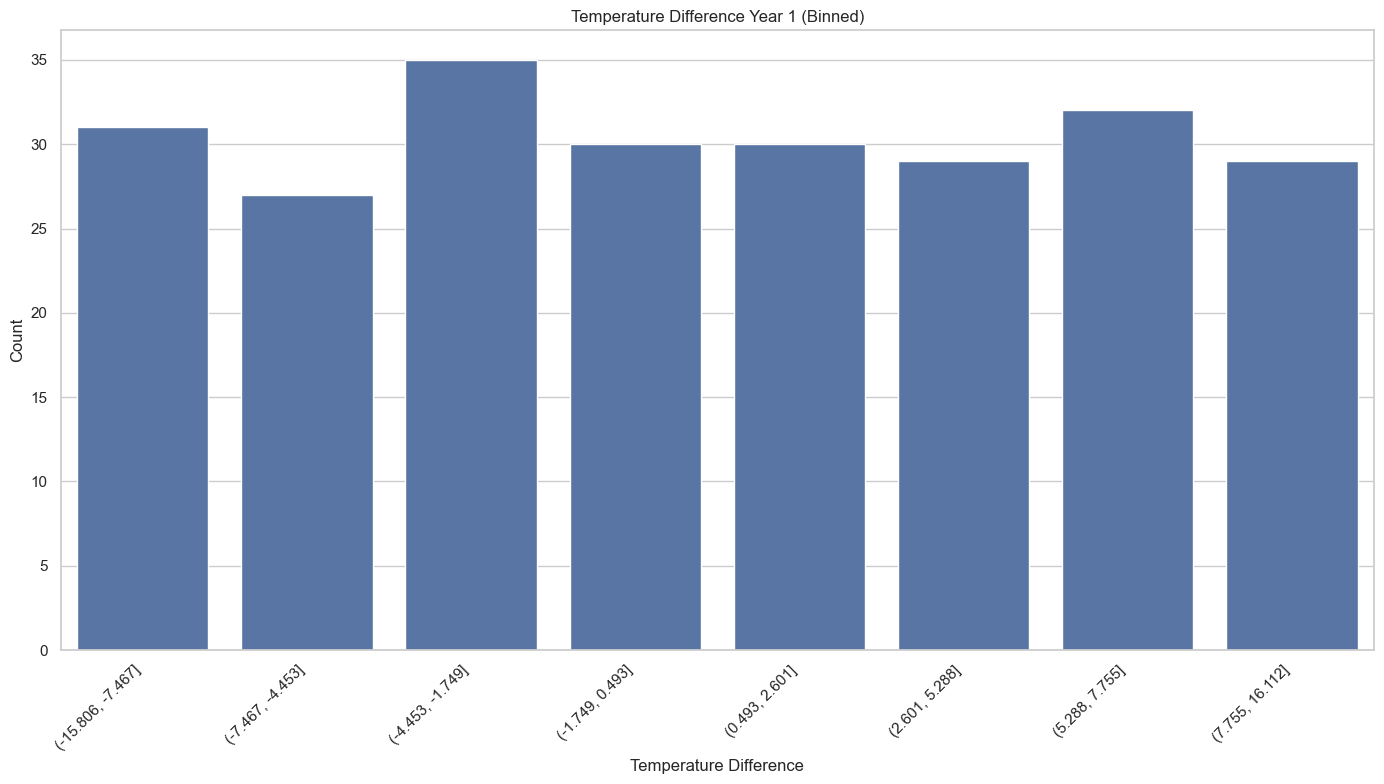

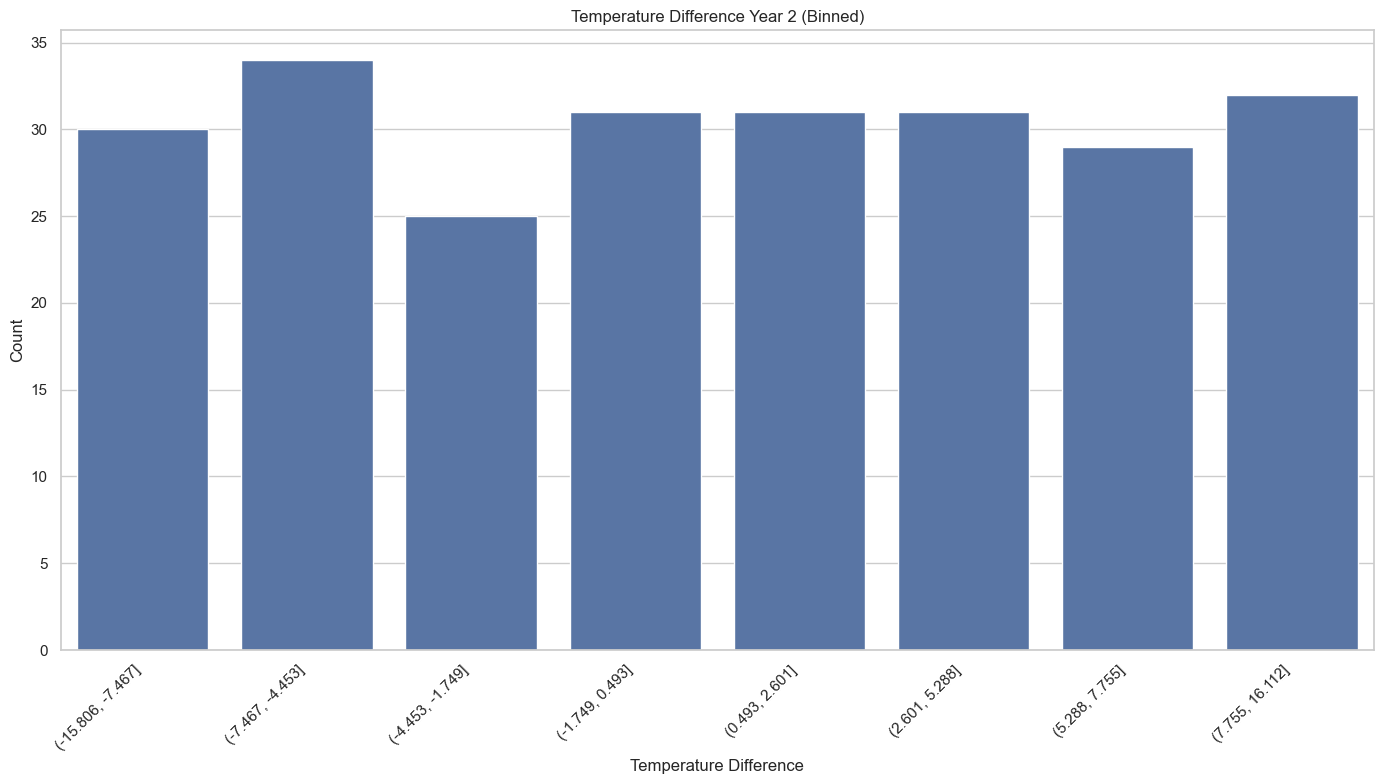

In [97]:
# Plot and save frequency bar graphs for binned differences
plot_and_save_frequency_bar_graph(merged_df, 'pci_diff_year1_binned', 'PCI Difference Year 1 (Binned)', 'PCI Difference', 'Count', 'pci_diff_year1_binned.png')
plot_and_save_frequency_bar_graph(merged_df, 'pci_diff_year2_binned', 'PCI Difference Year 2 (Binned)', 'PCI Difference', 'Count', 'pci_diff_year2_binned.png')
plot_and_save_frequency_bar_graph(merged_df, 'temp_diff_year1_binned', 'Temperature Difference Year 1 (Binned)', 'Temperature Difference', 'Count', 'temp_diff_year1_binned.png')
plot_and_save_frequency_bar_graph(merged_df, 'temp_diff_year2_binned', 'Temperature Difference Year 2 (Binned)', 'Temperature Difference', 'Count', 'temp_diff_year2_binned.png')


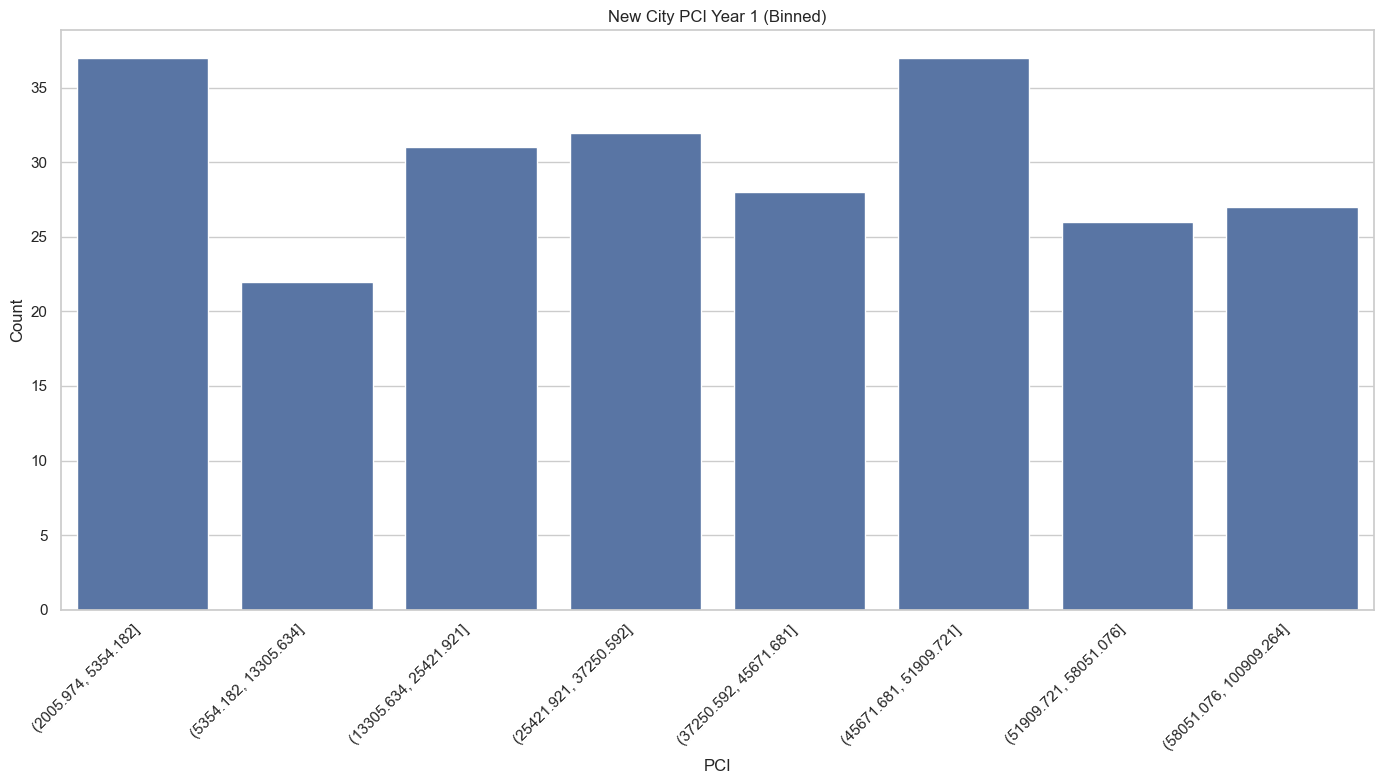

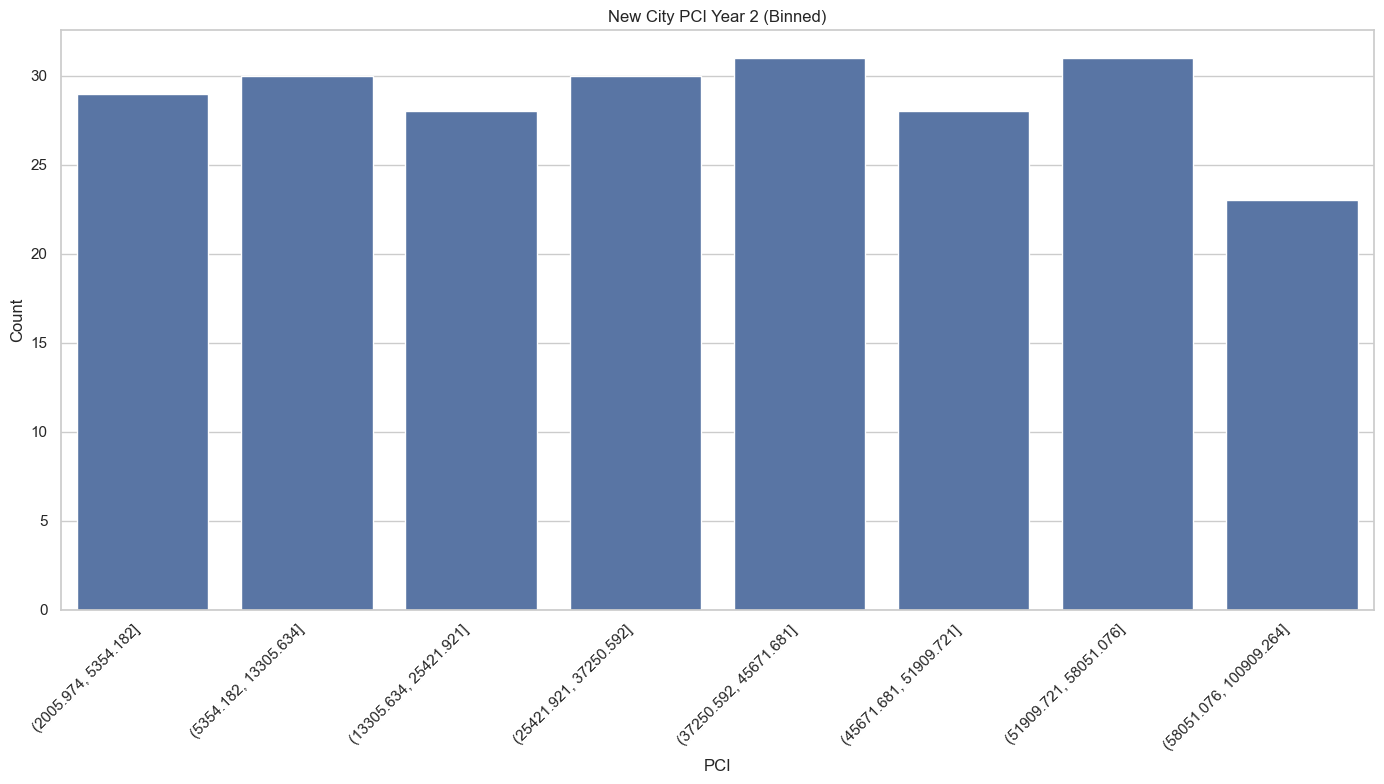

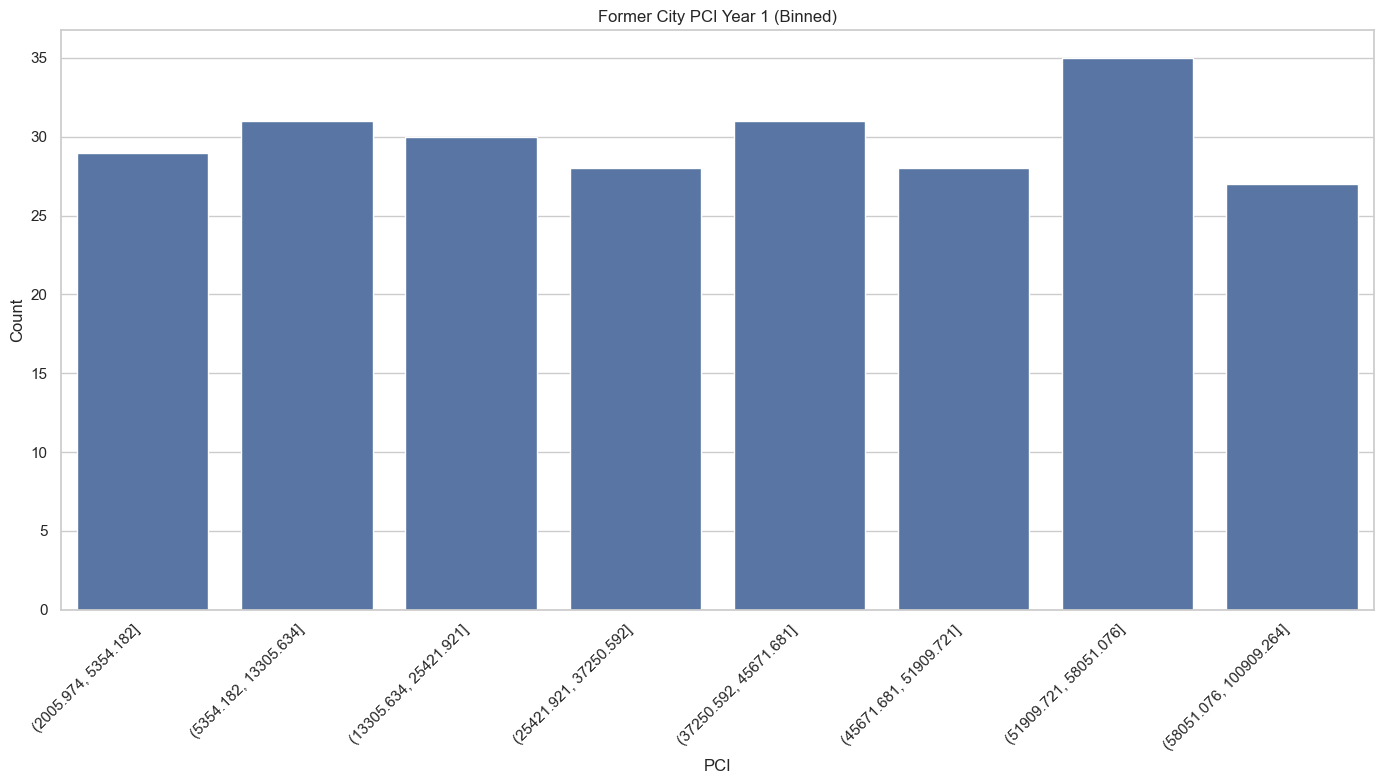

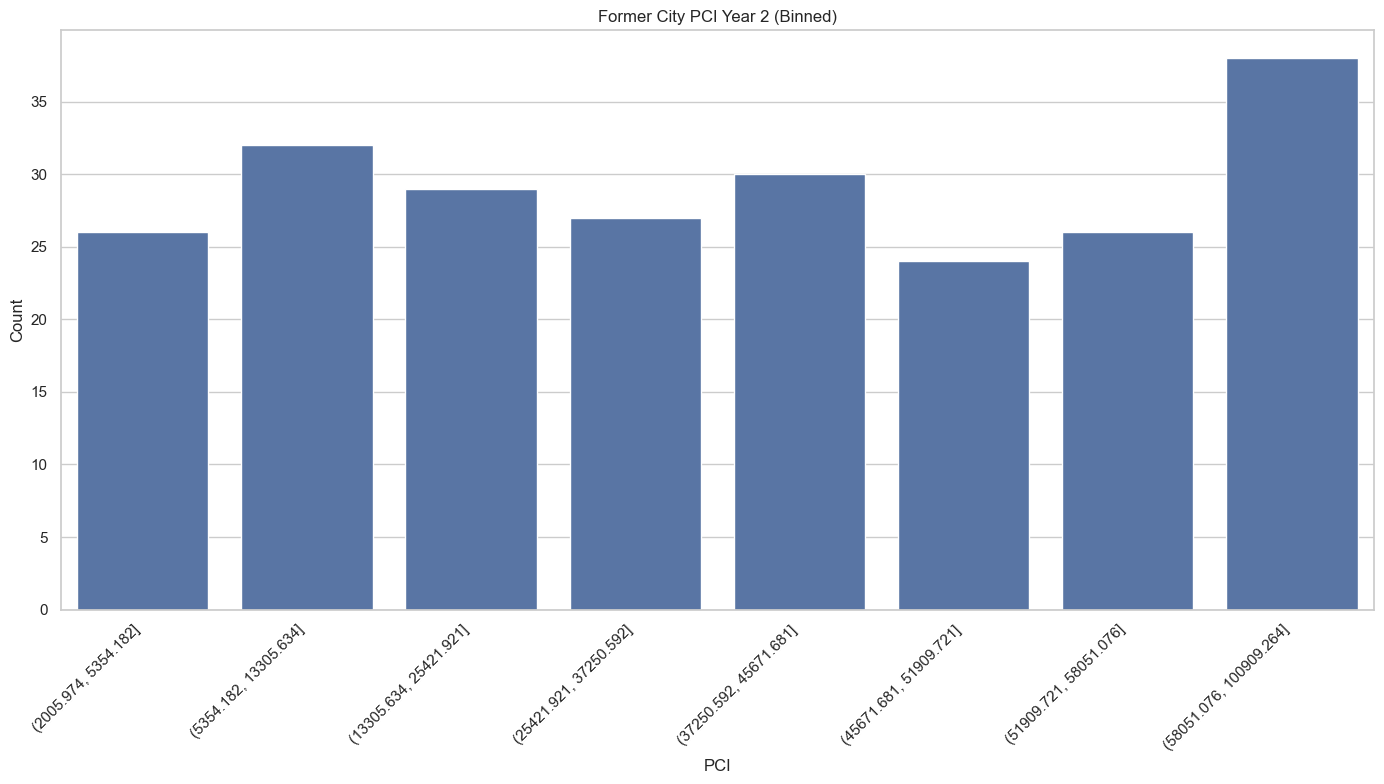

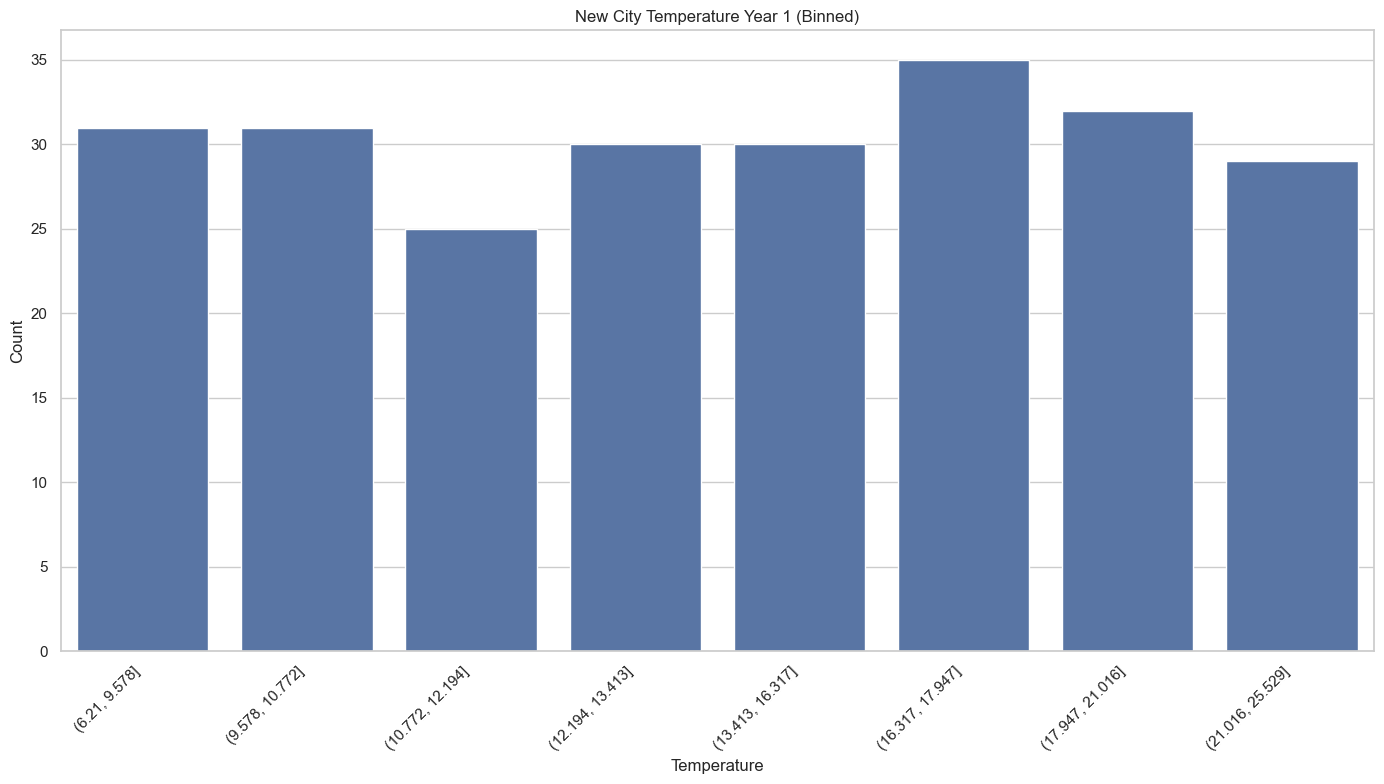

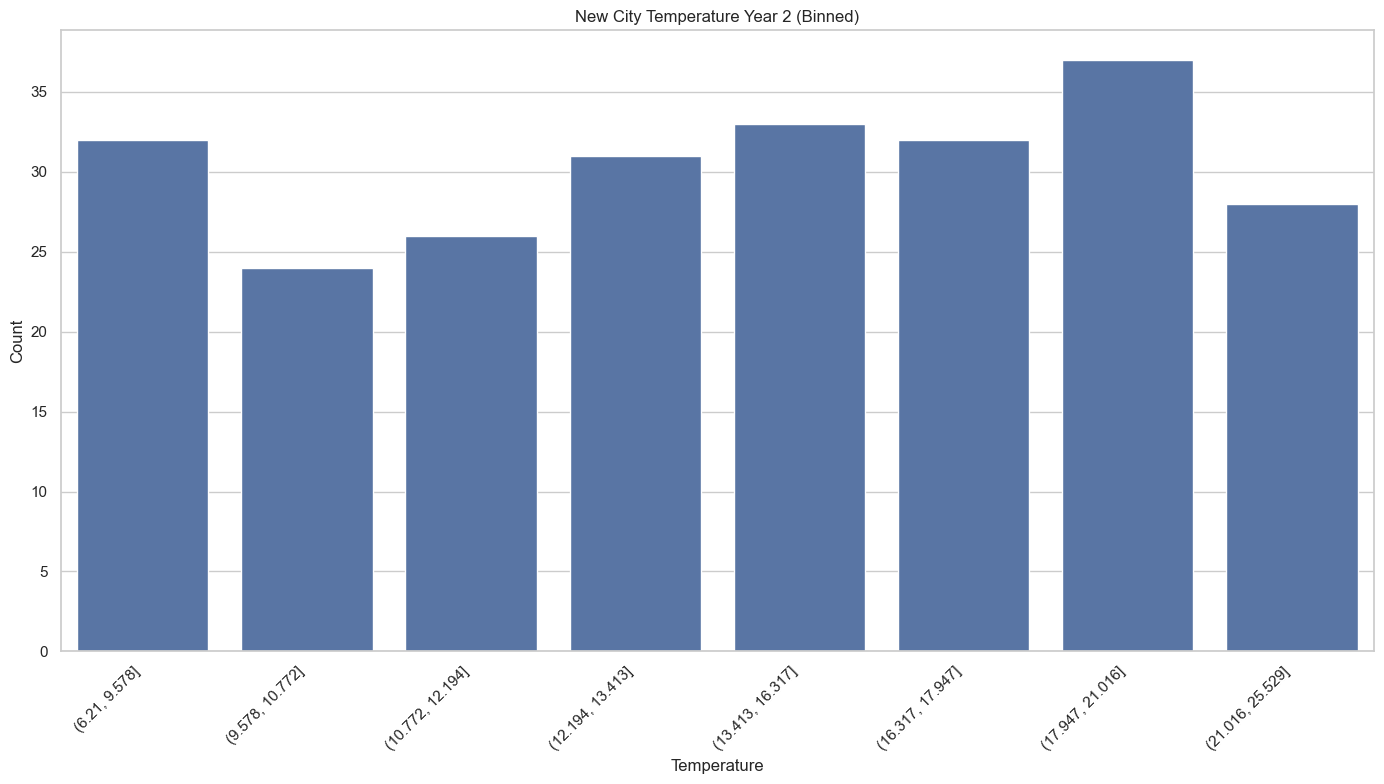

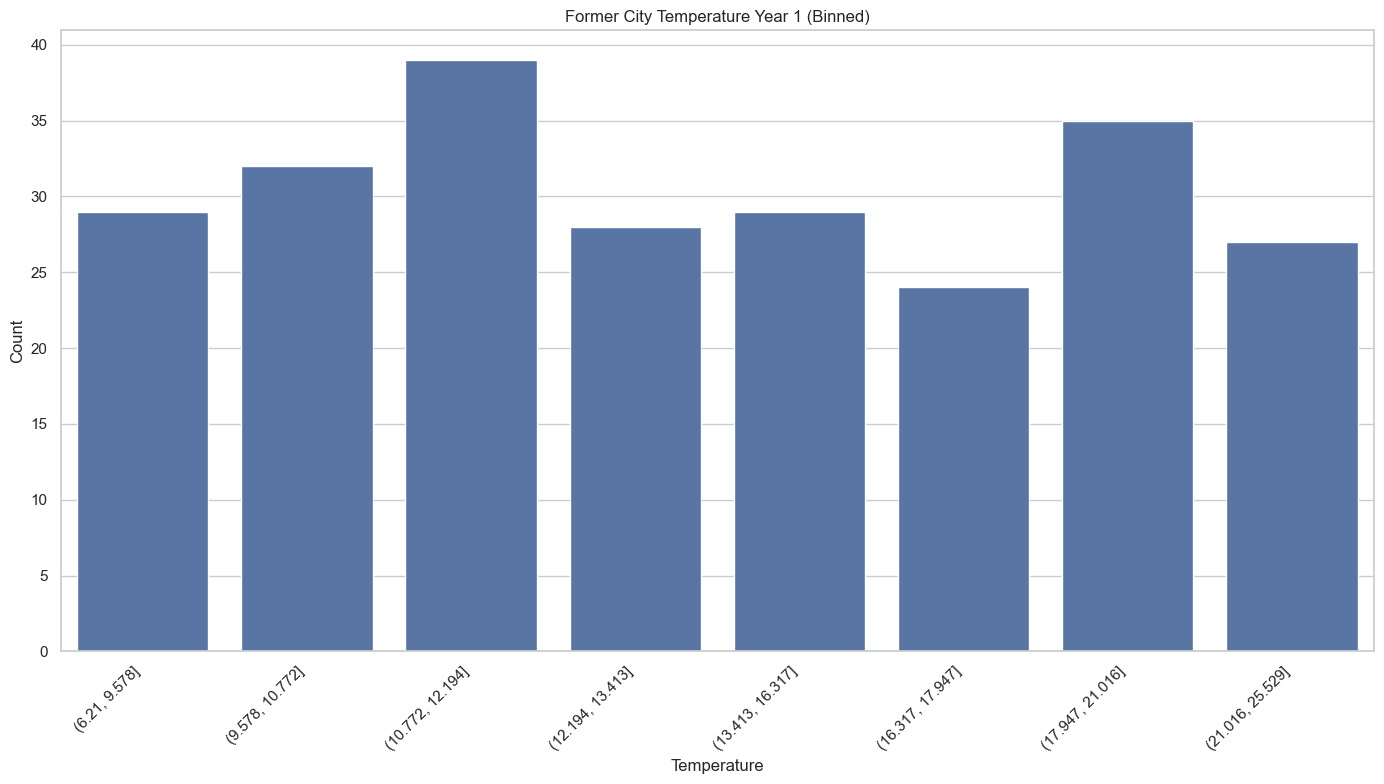

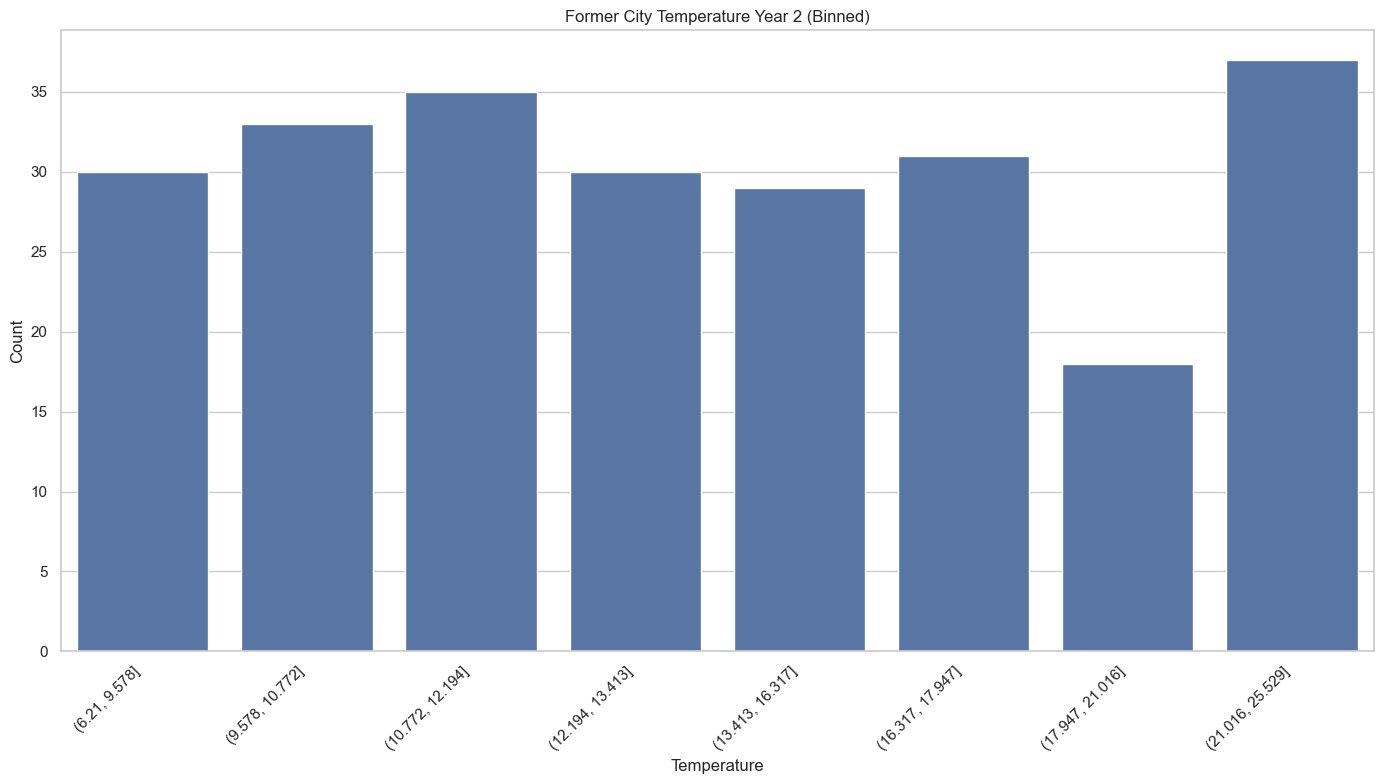

In [98]:
# Plot and save frequency bar graphs for non-differences (binned)
plot_and_save_frequency_bar_graph(merged_df, 'new_city_pci_year1_binned', 'New City PCI Year 1 (Binned)', 'PCI', 'Count', 'new_city_pci_year1_binned.png')
plot_and_save_frequency_bar_graph(merged_df, 'new_city_pci_year2_binned', 'New City PCI Year 2 (Binned)', 'PCI', 'Count', 'new_city_pci_year2_binned.png')
plot_and_save_frequency_bar_graph(merged_df, 'prev_city_pci_year1_binned', 'Former City PCI Year 1 (Binned)', 'PCI', 'Count', 'prev_city_pci_year1_binned.png')
plot_and_save_frequency_bar_graph(merged_df, 'prev_city_pci_year2_binned', 'Former City PCI Year 2 (Binned)', 'PCI', 'Count', 'prev_city_pci_year2_binned.png')
plot_and_save_frequency_bar_graph(merged_df, 'new_city_temp_year1_binned', 'New City Temperature Year 1 (Binned)', 'Temperature', 'Count', 'new_city_temp_year1_binned.png')
plot_and_save_frequency_bar_graph(merged_df, 'new_city_temp_year2_binned', 'New City Temperature Year 2 (Binned)', 'Temperature', 'Count', 'new_city_temp_year2_binned.png')
plot_and_save_frequency_bar_graph(merged_df, 'prev_city_temp_year1_binned', 'Former City Temperature Year 1 (Binned)', 'Temperature', 'Count', 'prev_city_temp_year1_binned.png')
plot_and_save_frequency_bar_graph(merged_df, 'prev_city_temp_year2_binned', 'Former City Temperature Year 2 (Binned)', 'Temperature', 'Count', 'prev_city_temp_year2_binned.png')

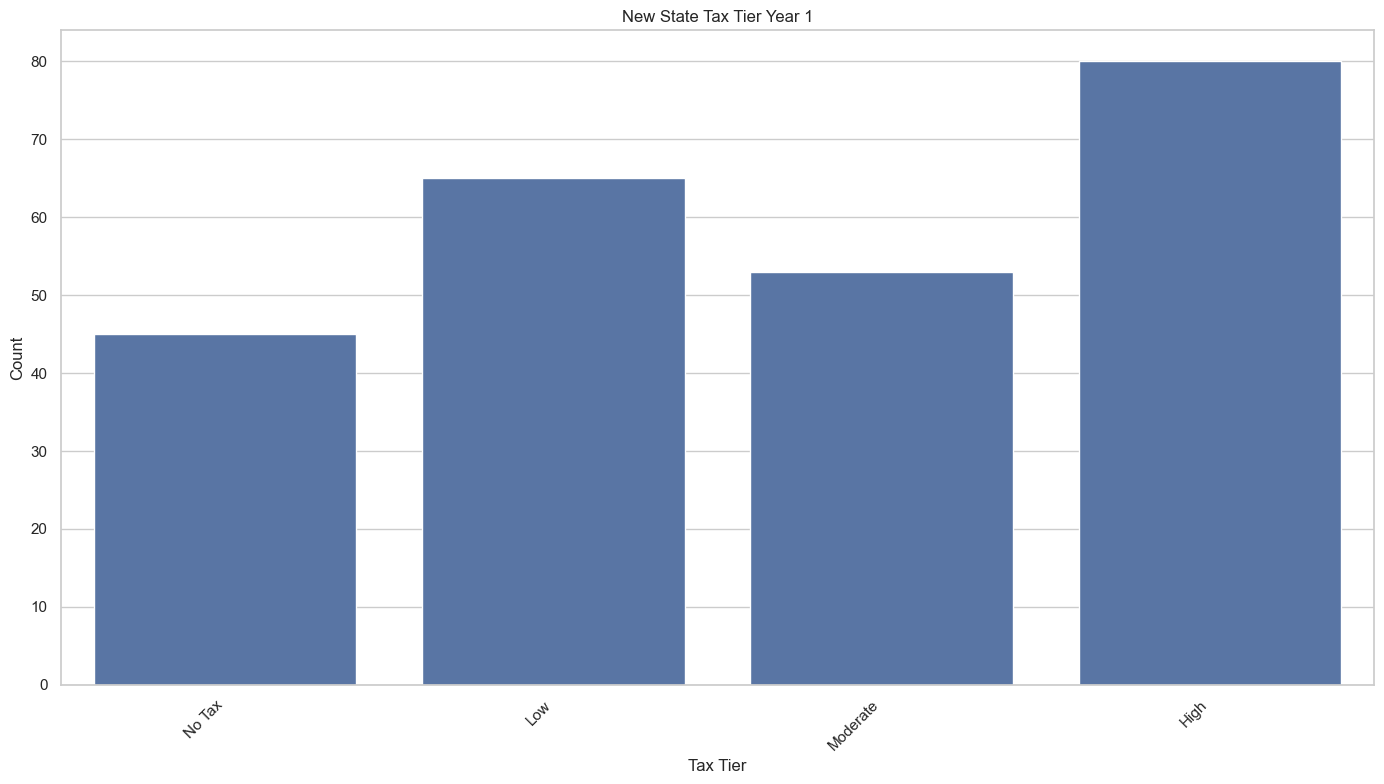

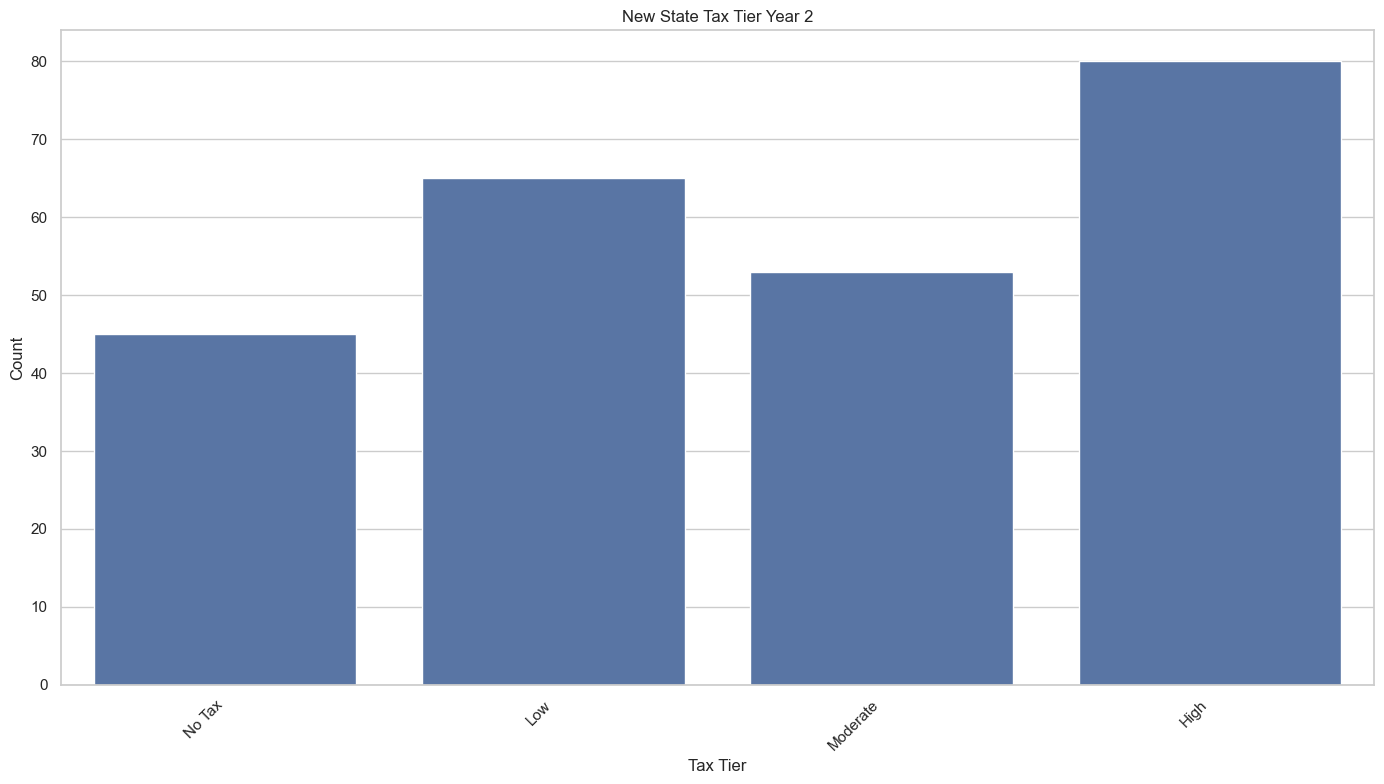

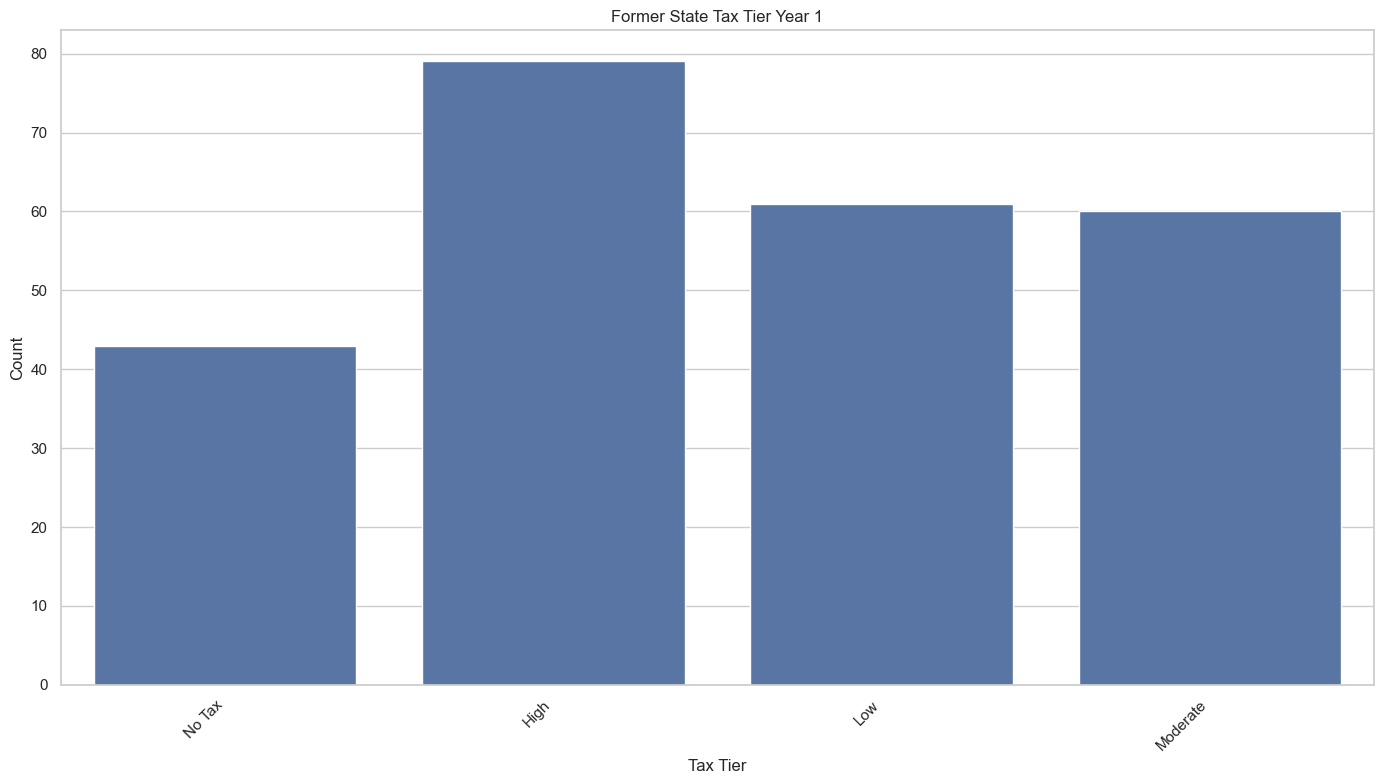

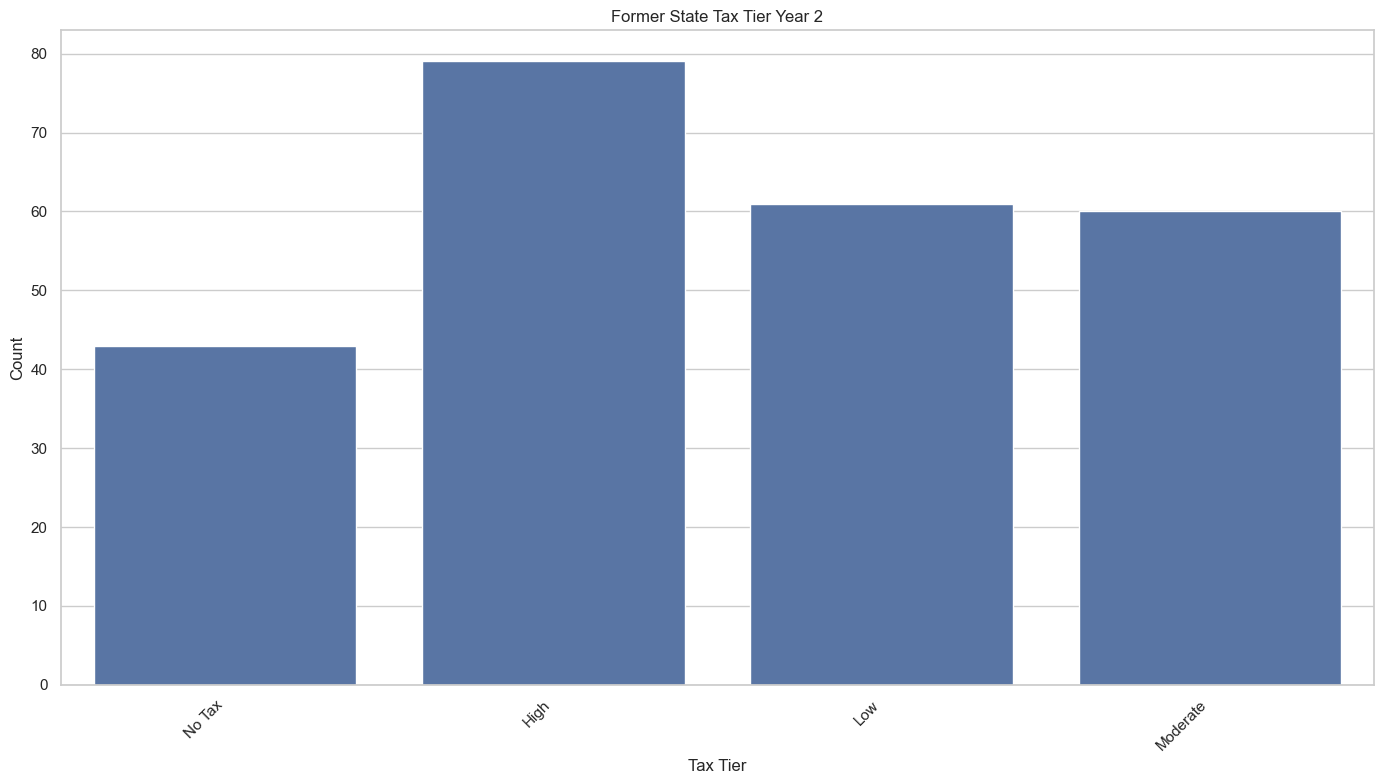

In [99]:
# Plot and save frequency bar graphs for tax tiers
plot_and_save_frequency_bar_graph(merged_df, 'new_state_tier_year1', 'New State Tax Tier Year 1', 'Tax Tier', 'Count', 'new_state_tier_year1.png')
plot_and_save_frequency_bar_graph(merged_df, 'new_state_tier_year2', 'New State Tax Tier Year 2', 'Tax Tier', 'Count', 'new_state_tier_year2.png')
plot_and_save_frequency_bar_graph(merged_df, 'prev_state_tier_year1', 'Former State Tax Tier Year 1', 'Tax Tier', 'Count', 'prev_state_tier_year1.png')
plot_and_save_frequency_bar_graph(merged_df, 'prev_state_tier_year2', 'Former State Tax Tier Year 2', 'Tax Tier', 'Count', 'prev_state_tier_year2.png')